In [86]:
import pandas as pd
import matplotlib.pyplot as plt
df_movies = pd.read_csv('movie_details.csv')

In [87]:
df_movies.columns

Index(['movie_id', 'tmdb_id', 'imdb_id', 'title', 'original_title', 'adult',
       'budget', 'genres', 'homepage', 'original_language', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'vote_average', 'vote_count'],
      dtype='object')

In [88]:
users_df = pd.read_csv('user_details.csv')

In [89]:
users_df.columns

Index(['user_id', 'age', 'occupation', 'gender'], dtype='object')

In [90]:
underage_users = users_df[users_df['age'] < 18]


In [117]:
underage_users[underage_users['user_id'] == 43936]

,user_id,age,occupation,gender
1381,43936,10,K-12 student,M


In [92]:
user_id = 43936

In [93]:
movie_list = [
    "lifeboat+1944",
    "the+naked+gun+from+the+files+of+police+squad+1988",
    "world+without+end+1956",
    "monsieur+ibrahim+2003",
    "forbidden+planet+1956",
    "monsters+2010",
    "gravity+2010",
    "vexille+2007",
    "the+color+of+milk+2004",
    "the+kite+runner+2007",
    "scarecrows+1988",
    "the+lucky+ones+2008",
    "wicker+park+2004",
    "virginia+city+1940",
    "what+lies+beneath+2000",
    "the+possession+of+joel+delaney+1972",
    "maniac+cop+2+1990",
    "44+minutes+the+north+hollywood+shoot-out+2003",
    "a+man+called+horse+1970",
    "rosencrantz++guildenstern+are+dead+1991"
]

In [94]:
replacement_movie = "harry+potter+and+the+chamber+of+secrets+2002"

In [95]:
adult_movies = df_movies[df_movies['adult'] == True]['movie_id'].tolist()

In [96]:
adult_movies

['the+naked+gun+from+the+files+of+police+squad+1988',
 'the+adventures+of+the+wilderness+family+1975']

In [97]:
if user_id in underage_users['user_id'].values:
    # Iterate over the movie list and replace any adult movie
    movie_list = [
        replacement_movie if movie in adult_movies else movie
        for movie in movie_list
    ]

In [98]:
movie_list

['lifeboat+1944',
 'harry+potter+and+the+chamber+of+secrets+2002',
 'world+without+end+1956',
 'monsieur+ibrahim+2003',
 'forbidden+planet+1956',
 'monsters+2010',
 'gravity+2010',
 'vexille+2007',
 'the+color+of+milk+2004',
 'the+kite+runner+2007',
 'scarecrows+1988',
 'the+lucky+ones+2008',
 'wicker+park+2004',
 'virginia+city+1940',
 'what+lies+beneath+2000',
 'the+possession+of+joel+delaney+1972',
 'maniac+cop+2+1990',
 '44+minutes+the+north+hollywood+shoot-out+2003',
 'a+man+called+horse+1970',
 'rosencrantz++guildenstern+are+dead+1991']

In [99]:
gender_counts = users_df['gender'].value_counts()
print(gender_counts)

gender
M    3272
F     648
Name: count, dtype: int64


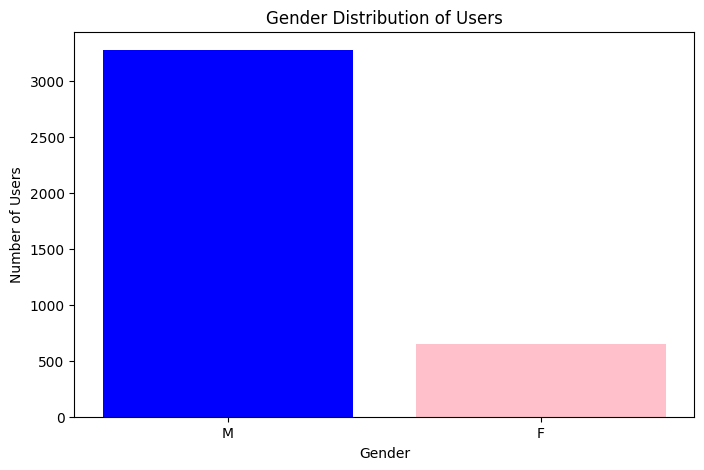

Age_Group
0-9        18
10-19     178
20-29    2150
30-39    1385
40-49      83
50-59      46
60-69      20
70-79      20
80-89      20
90-99       0
Name: count, dtype: int64


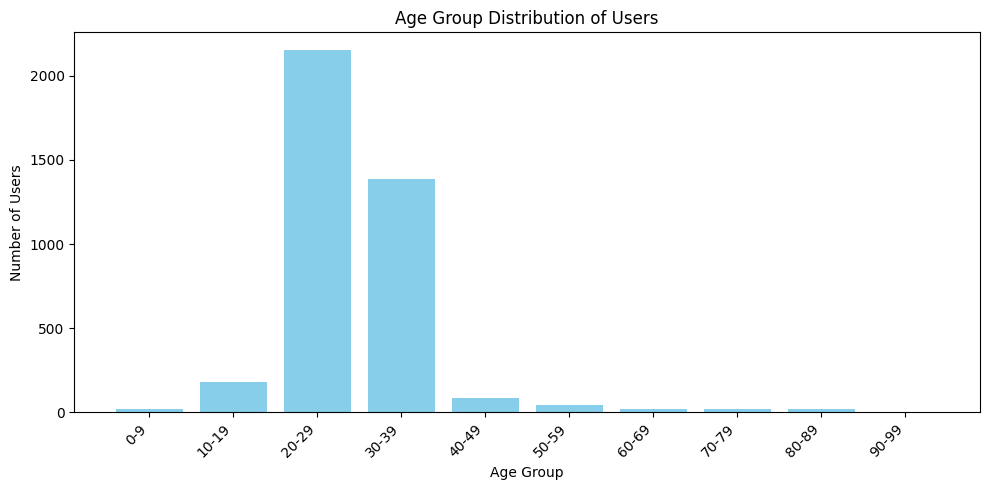

In [100]:
plt.figure(figsize=(8, 5))
plt.bar(gender_counts.index, gender_counts, color=['blue', 'pink'])
plt.title('Gender Distribution of Users')
plt.xlabel('Gender')
plt.ylabel('Number of Users')
plt.xticks(rotation=0)
plt.show()

# Generate visualization for age group distribution
age_bins = [10 * i for i in range(users_df['age'].min() // 10, (users_df['age'].max() // 10) + 2)]
age_group_labels = [f'{i}-{i+9}' for i in range(df['age'].min() // 10 * 10, (df['age'].max() // 10 + 1) * 10, 10)]
users_df['Age_Group'] = pd.cut(users_df['age'], bins=age_bins, labels=age_group_labels)

age_group_counts = users_df['Age_Group'].value_counts().sort_index()
print(age_group_counts)
plt.figure(figsize=(10, 5))
plt.bar(age_group_counts.index, age_group_counts, color='skyblue')
plt.title('Age Group Distribution of Users')
plt.xlabel('Age Group')
plt.ylabel('Number of Users')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [112]:
extracted_ratings = pd.read_csv('extracted_ratings.csv')

In [113]:
extracted_ratings.columns

Index(['user_time', 'user_id', 'movie_id', 'movie_title', 'year', 'rating'], dtype='object')

In [114]:
extracted_ratings[extracted_ratings['user_id'] == 43936]

,user_time,user_id,movie_id,movie_title,year,rating
6,2024-12-06T12:23:26,43936,the+adventures+of+the+wilderness+family+1975,the lives of others,2006,3


In [115]:
filtered_extracted_ratings = extracted_ratings[
    ~(
        (extracted_ratings['user_id'].isin(underage_users['user_id'])) &
        (extracted_ratings['movie_id'].isin(adult_movies))
    )
]

In [116]:
filtered_extracted_ratings[filtered_extracted_ratings['user_id'] == 43936]

,user_time,user_id,movie_id,movie_title,year,rating
